<a href="https://colab.research.google.com/github/dimpupradev/base/blob/main/Skin_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define image size and batch size
IMG_SIZE = 224
BATCH_SIZE = 32

In [ ]:
# Define data generators for train, validation and test sets
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/cancer-proj/melanoma_cancer_dataset/train',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

Found 7692 images belonging to 2 classes.


In [ ]:
val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/cancer-proj/melanoma_cancer_dataset/train',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

Found 1923 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/cancer-proj/melanoma_cancer_dataset/test',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [ ]:
# Define the model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,validation_data=val_generator,epochs=1)

241/241 [==============================] - 1614s 7s/step - loss: 0.4531 - accuracy: 0.7808 - val_loss: 0.3129 - val_accuracy: 0.8710


In [ ]:
model.save("Model.h5","label.txt")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#test your image
from keras.models import load_model  # TensorFlow is required for Keras to work
from tensorflow.keras.preprocessing import image
import numpy as np

#load the model
model = load_model('/content/Model.h5')
#load and preprocess the test image
test_image_path='/content/drive/MyDrive/cancer-proj/melanoma_cancer_dataset/test/malignant/melanoma_10132.jpg'
img=image.load_img(test_image_path,target_size=(224,224))
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/=255.
class_names = ['You have malignant cancer','You have benign cancer']
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

In [ ]:
image = Image.open("/content/drive/MyDrive/cancer-proj/melanoma_cancer_dataset/test/malignant/melanoma_10132.jpg").convert("RGB")
# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the arraye
data[0] = normalized_image_array

1/1 [==============================] - 0s 47ms/step
Prediction:benign(probability: 0.49995518 )
Accuracy: 0.4990926


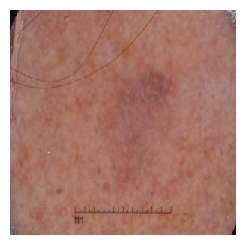

In [ ]:
#print the prediction
import matplotlib.pyplot as plt
prediction = model.predict(data)
index = np.argmax(prediction)
confidence_score = prediction[0][index]
img_array /=255. #normalize the pixel
#make predictions
prediction=model.predict(img_array)
# Print prediction and confidence score
if prediction>0.5:
  print("Prediction:malignant(probability:",prediction[0][0],")")
else:
  print("Prediction:benign(probability:",prediction[0][0],")")
print("Accuracy:",confidence_score)
plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
pip install numpy matplotlib reportlab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter

# Example prediction value
prediction = 0.5

# Extract predicted class and confidence score
predicted_class = "Malignant" if prediction > 0.5 else "Benign"
confidence_score = prediction

# Print prediction and confidence score
print("Predicted Class:", predicted_class)
print("Confidence Score:", confidence_score)

# Convert prediction information to a text message
text_message = f"The predicted class is {predicted_class} with a confidence score of {confidence_score:.2f}."

# Save the plot as an image
#plt.plot([1, 2, 3], [1, 2, 3])  # Example plot
plt.savefig('medical_image.png')
#plt.close()

# Generate PDF report
with open("medical_report.pdf", "wb") as f:
    c = canvas.Canvas(f, pagesize=letter)
    c.drawString(100, 700, "Medical Report")
    c.drawString(100, 680, f"Predicted Class: {predicted_class}")
    c.drawString(100, 660, f"Confidence Score: {confidence_score:.2f}")
    c.drawImage("medical_image.png", 100, 400, width=300, height=200)
    c.save()

print("Medical report generated.")

Predicted Class: Benign
Confidence Score: 0.5
Medical report generated.


<Figure size 640x480 with 0 Axes>

In [ ]:
!pip install gtts

In [ ]:
from gtts import gTTS
import os

# Your medical report text
if prediction>0.5:
  text = "you have malignant"
else:
  text="you have benign"

# Create a gTTS object
tts = gTTS(text=text, lang='en', slow=False)

# Save the audio file
tts.save("medical_report.mp3")

# Play the audio file
os.system("start medical_report.mp3")

32512